# **Projet de Proba.**
#### **Realise par: EL KADI Salma & BOUABOUD Yasmin**

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression



# Etape 2:

In [69]:
data=pd.read_csv("StudentPerformanceFactors.csv")
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [38]:
data.shape

(6607, 20)

**Le jeu de données contient 6607 observations et 20 variables.**

In [39]:
data.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

# la variable cible:
- Ce jeu de données décrit les caractéristiques académiques, socio-économiques et personnelles d’élèves, avec pour objectif de prédire leur note à l’examen : "Exam Score" .

# Les variables explicatives :
- Hours Studied, Attendance, Parental Involvement, Access to Resources, Extracurricular Activities, Sleep Hours, Previous Scores, Motivation Level, Internet Access, Tutoring Sessions, Family Income, Teacher Quality, School Type, Peer Influence, Physical Activity, Learning Disabilities, Parental Education Level, Distance from Home, Gender

In [40]:
data.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

### Variables Quantitatives :
- **Continues** : Hours_Studied, Attendance, Sleep_Hours, Previous_Scores, Exam_Score
- **Discrètes** : Tutoring_Sessions, Physical_Activity

### Variables Qualitatives :
- **Nominales** : Parental_Involvement, Access_to_Resources, Extracurricular_Activities, Internet_Access, Family_Income, School_Type, Learning_Disabilities, Gender, Distance_from_Home
- **Ordinales** : Motivation_Level, Teacher_Quality, Peer_Influence, Parental_Education_Level
### Variables Binaires :
- Extracurricular_Activities (Yes/No)
- Internet_Access (Yes/No)
- Learning_Disabilities (Yes/No)
- Gender (Male/Female)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

**Le dataset comporte 6 607 observations. Trois colonnes contiennent des valeurs manquantes :**

* Teacher_Quality : 78 manquants

* Parental_Education_level : 90 manquants

* Distance_from_Home : 67 manquants

**Toutes les autres variables sont complètes.**

In [42]:
# Remplissage par le mode pour les variables qualitatives avec valeurs manquantes
data['Teacher_Quality'].fillna(data['Teacher_Quality'].mode()[0], inplace=True)
data['Parental_Education_Level'].fillna(data['Parental_Education_Level'].mode()[0], inplace=True)
data['Distance_from_Home'].fillna(data['Distance_from_Home'].mode()[0], inplace=True)

# Vérification
print("Valeurs manquantes après traitement:")
print(data[['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']].isnull().sum())


Valeurs manquantes après traitement:
Teacher_Quality             0
Parental_Education_Level    0
Distance_from_Home          0
dtype: int64


C:\Users\Salma\AppData\Local\Temp\ipykernel_15908\186051274.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Teacher_Quality'].fillna(data['Teacher_Quality'].mode()[0], inplace=True)
C:\Users\Salma\AppData\Local\Temp\ipykernel_15908\186051274.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

Pour chaque variable, nous remplaçons les valeurs manquantes par **la valeur la plus fréquente** (mode).

**Justification :**
1. **Variables qualitatives** : Ces trois variables sont catégorielles (ordinales ou nominales)
2. **Faible proportion** : Moins de 1.5% de valeurs manquantes par variable
3. **Préservation des données** : Cette méthode évite la suppression d'observations
4. **Simplicité** : Le mode est une mesure robuste pour les données catégorielles

**Résultat:**

Après imputation, le dataset est complet sans aucune valeur manquante, prêt pour les prochaines étapes de prétraitement.

In [43]:
# Vérifier combien de lignes sont exactement identiques
data.duplicated().sum()


np.int64(0)

**Toutes les lignes sont uniques**

In [44]:

print("=== VÉRIFICATION DES VALEURS CATÉGORIELLES ===")
cat_cols = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 
            'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
            'School_Type', 'Peer_Influence', 'Learning_Disabilities', 
            'Parental_Education_Level', 'Distance_from_Home', 'Gender']

for col in cat_cols:
    print(f"\n{col}:")
    print(sorted(data[col].unique()))

print("\n=== VÉRIFICATION DES VALEURS NUMÉRIQUES ===")
num_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
            'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']

for col in num_cols:
    print(f"\n{col}:")
    print(f"  Min: {data[col].min()}, Max: {data[col].max()}, Mean: {data[col].mean():.2f}")
    # Vérification des valeurs aberrantes potentielles
    if data[col].min() < 0:
        print("ATTENTION: Valeurs négatives détectées!")

=== VÉRIFICATION DES VALEURS CATÉGORIELLES ===

Parental_Involvement:
['High', 'Low', 'Medium']

Access_to_Resources:
['High', 'Low', 'Medium']

Extracurricular_Activities:
['No', 'Yes']

Motivation_Level:
['High', 'Low', 'Medium']

Internet_Access:
['No', 'Yes']

Family_Income:
['High', 'Low', 'Medium']

Teacher_Quality:
['High', 'Low', 'Medium']

School_Type:
['Private', 'Public']

Peer_Influence:
['Negative', 'Neutral', 'Positive']

Learning_Disabilities:
['No', 'Yes']

Parental_Education_Level:
['College', 'High School', 'Postgraduate']

Distance_from_Home:
['Far', 'Moderate', 'Near']

Gender:
['Female', 'Male']

=== VÉRIFICATION DES VALEURS NUMÉRIQUES ===

Hours_Studied:
  Min: 1, Max: 44, Mean: 19.98

Attendance:
  Min: 60, Max: 100, Mean: 79.98

Sleep_Hours:
  Min: 4, Max: 10, Mean: 7.03

Previous_Scores:
  Min: 50, Max: 100, Mean: 75.07

Tutoring_Sessions:
  Min: 0, Max: 8, Mean: 1.49

Physical_Activity:
  Min: 0, Max: 6, Mean: 2.97

Exam_Score:
  Min: 55, Max: 101, Mean: 67.24


### Variables catégorielles
Toutes les variables catégorielles présentent des catégories cohérentes et bien orthographiées :

- **Variables à 2 catégories** : Extracurricular_Activities (Yes/No), Internet_Access (Yes/No), Learning_Disabilities (Yes/No), Gender (Female/Male), School_Type (Private/Public)
- **Variables à 3 catégories** : Parental_Involvement, Access_to_Resources, Motivation_Level, Family_Income, Teacher_Quality, Peer_Influence, Distance_from_Home
- **Variables éducatives** : Parental_Education_Level (High School/College/Postgraduate)

**Aucune incohérence** n'a été détectée dans les catégories.

### Variables numériques
Les plages de valeurs sont réalistes et cohérentes avec le contexte éducatif :

| Variable | Min | Max | Moyenne | Commentaire |
|----------|-----|-----|---------|-------------|
| Hours_Studied | 1 | 44 | 19.98 | Plage réaliste (1-44h/semaine) |
| Attendance | 60 | 100 | 79.98 | En pourcentage, valeurs cohérentes |
| Sleep_Hours | 4 | 10 | 7.03 | Plage normale de sommeil |
| Previous_Scores | 50 | 100 | 75.07 | Notes précédentes sur 100 |
| Tutoring_Sessions | 0 | 8 | 1.49 | 0 à 8 séances de tutorat |
| Physical_Activity | 0 | 6 | 2.97 | 0 à 6h d'activité physique |
| Exam_Score | 55 | 101 | 67.24 | **Note : score maximum de 101** |

### Observation particulière
La variable `Exam_Score` présente un maximum de **101**, ce qui dépasse la notation classique sur 100. Cela pourrait s'expliquer par :
- Un système de bonus ou points supplémentaires
- Une erreur de saisie marginale
- Une échelle de notation différente

**Décision** : Conserver cette valeur en l'absence d'information contraire, car elle ne représente qu'un cas isolé et n'affectera pas significativement les modèles.

### Conclusion
Le dataset est **globalement très propre** avec des valeurs cohérentes et réalistes. Aucune correction majeure n'est nécessaire avant de passer aux étapes de prétraitement.

## Détection et traitement des valeurs aberrantes

Dans cette étape, nous analysons la présence de valeurs aberrantes (outliers)
afin d’évaluer leur impact potentiel sur les analyses statistiques.
Les outliers sont identifiés à l’aide des statistiques descriptives
et des boxplots.


In [45]:
numeric_cols = data.select_dtypes(include=["int64", "float64"]).columns
data[numeric_cols].describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


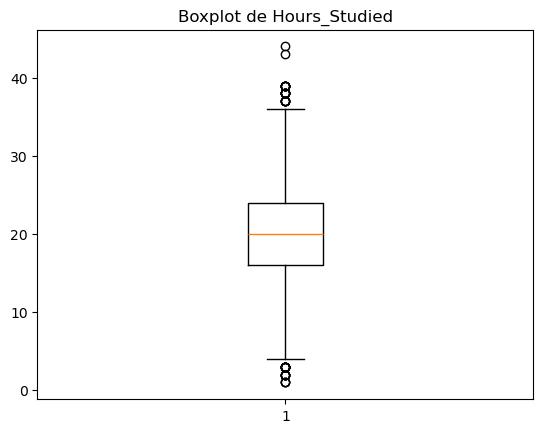

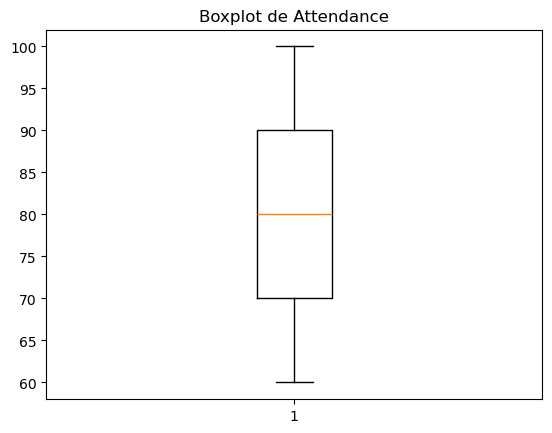

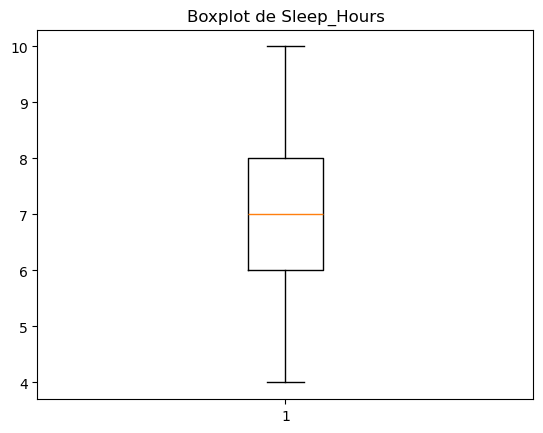

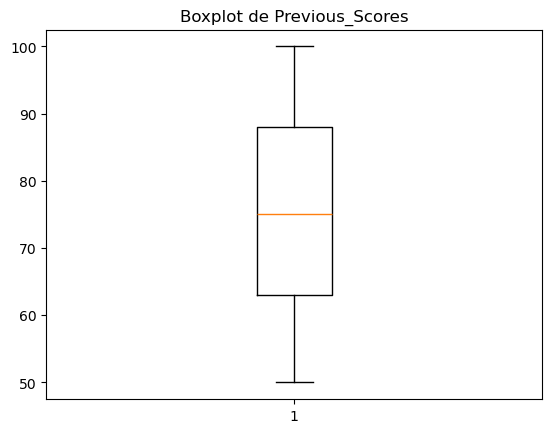

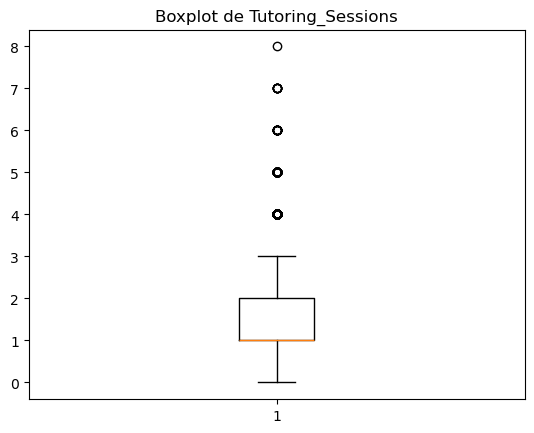

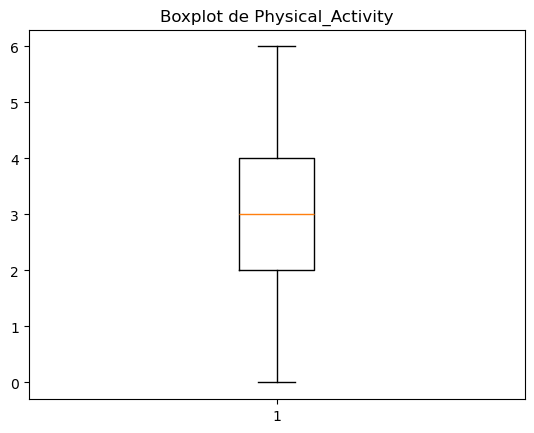

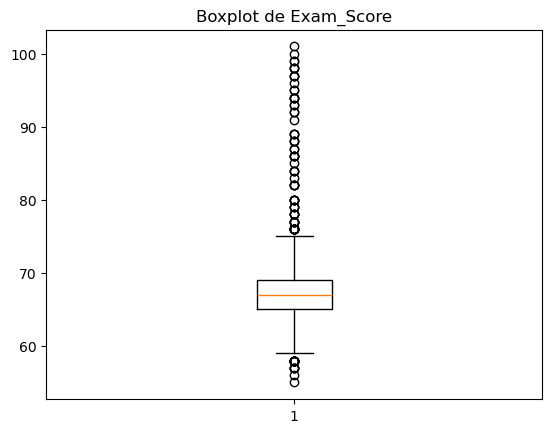

In [46]:
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure()
    plt.boxplot(data[col])
    plt.title(f"Boxplot de {col}")
    plt.show()


### **Interprétation et décision**

Les boxplots montrent la présence de valeurs extrêmes pour certaines variables,
notamment `Hours_Studied`, `Tutoring_Sessions` et `Exam_Score`.

Ces valeurs correspondent à des situations réelles (fort investissement,
difficultés scolaires, accompagnement intensif) et ne sont pas dues
à des erreurs de saisie.

 **Décision : les valeurs aberrantes sont conservées.**

**Justification :**
La suppression de ces valeurs pourrait entraîner une perte d’information
et biaiser les résultats de l’analyse.


## Transformation et formatage des variables

Certaines variables sont qualitatives et doivent être transformées
en variables numériques afin de pouvoir être utilisées
dans les analyses statistiques.


In [47]:
categorical_cols = data.select_dtypes(include="object").columns

df_encoded = pd.get_dummies(
    data,
    columns=categorical_cols,
    drop_first=True
)

df_encoded.head()


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,23,84,7,73,0,3,67,True,False,False,...,True,True,False,True,False,True,False,False,True,True
1,19,64,8,59,2,4,61,True,False,False,...,True,True,False,False,False,False,False,True,False,False
2,24,98,7,91,2,4,74,False,True,False,...,True,True,True,False,False,False,True,False,True,True
3,29,89,8,98,1,4,71,True,False,False,...,True,True,False,False,False,True,False,True,False,True
4,19,92,6,65,3,4,70,False,True,False,...,False,True,True,False,False,False,False,False,True,False


Les variables qualitatives ont été transformées à l’aide de l’encodage One-Hot.
Chaque catégorie est représentée par une variable binaire (0 ou 1).

L’option `drop_first=True` permet d’éviter la colinéarité entre les variables.


## Standardisation des variables

Les variables numériques n’ont pas toutes la même échelle.
Une standardisation est donc appliquée afin de rendre les variables comparables.



In [48]:
from sklearn.preprocessing import StandardScaler

numeric_cols_encoded = df_encoded.select_dtypes(
    include=["int64", "float64"]
).columns

scaler = StandardScaler()

df_scaled = df_encoded.copy()
df_scaled[numeric_cols_encoded] = scaler.fit_transform(
    df_encoded[numeric_cols_encoded]
)

df_scaled[numeric_cols_encoded].describe()


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03
mean,-1.161474e-16,-3.089199e-16,-2.016449e-16,2.048712e-16,7.850707e-17,-1.720703e-17,-1.178681e-15
std,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00
min,-3.167760e+00,-1.730158e+00,-2.063380e+00,-1.741167e+00,-1.213934e+00,-2.877953e+00,-3.145283e+00
25%,-6.636453e-01,-8.641026e-01,-7.009903e-01,-8.383073e-01,-4.012417e-01,-9.383768e-01,-5.746957e-01
50%,4.118568e-03,1.953115e-03,-1.979558e-02,-4.898448e-03,-4.012417e-01,3.141133e-02,-6.057825e-02
75%,6.718825e-01,8.680088e-01,6.613991e-01,8.979612e-01,4.114511e-01,1.001199e+00,4.535392e-01
max,4.010702e+00,1.734065e+00,2.023788e+00,1.731370e+00,5.287608e+00,2.940776e+00,8.679419e+00


La standardisation (moyenne nulle et écart-type égal à 1) permet d’éviter
qu’une variable ayant une grande échelle domine les autres.

Cette étape est essentielle pour les analyses multivariées
et les modèles statistiques.


## Vérification finale des données

Une vérification finale est réalisée afin de s’assurer
que le jeu de données est cohérent et prêt pour l’analyse.


In [49]:
df_scaled.isnull().sum()

Hours_Studied                            0
Attendance                               0
Sleep_Hours                              0
Previous_Scores                          0
Tutoring_Sessions                        0
Physical_Activity                        0
Exam_Score                               0
Parental_Involvement_Low                 0
Parental_Involvement_Medium              0
Access_to_Resources_Low                  0
Access_to_Resources_Medium               0
Extracurricular_Activities_Yes           0
Motivation_Level_Low                     0
Motivation_Level_Medium                  0
Internet_Access_Yes                      0
Family_Income_Low                        0
Family_Income_Medium                     0
Teacher_Quality_Low                      0
Teacher_Quality_Medium                   0
School_Type_Public                       0
Peer_Influence_Neutral                   0
Peer_Influence_Positive                  0
Learning_Disabilities_Yes                0
Parental_Ed

In [50]:
df_scaled.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,0.504942,0.348375,-0.019796,-0.143800,-1.213934,0.031411,-0.060578,True,False,False,...,True,True,False,True,False,True,False,False,True,True
1,-0.162822,-1.383736,0.661399,-1.116110,0.411451,1.001199,-1.602931,True,False,False,...,True,True,False,False,False,False,False,True,False,False
2,0.671882,1.560853,-0.019796,1.106313,0.411451,1.001199,1.738833,False,True,False,...,True,True,True,False,False,False,True,False,True,True
3,1.506587,0.781403,0.661399,1.592469,-0.401242,1.001199,0.967657,True,False,False,...,True,True,False,False,False,True,False,True,False,True
4,-0.162822,1.041220,-0.700990,-0.699406,1.224144,1.001199,0.710598,False,True,False,...,False,True,True,False,False,False,False,False,True,False


### **Conclusion de l’étape 2 – Prétraitement des données**

Les données ont été soigneusement préparées :
- les valeurs aberrantes ont été analysées et conservées lorsqu’elles étaient pertinentes,
- les variables ont été transformées et mises à l’échelle,
- la cohérence globale du jeu de données a été vérifiée.

Le jeu de données est désormais prêt pour l’analyse statistique.


# **Etape 3:**

In [51]:
data['Exam_Score'].describe()

count    6607.000000
mean       67.235659
std         3.890456
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       101.000000
Name: Exam_Score, dtype: float64

### **Analyse descriptive de la variable cible `Exam_Score`**

**Interprétation**

1. **Distribution symétrique** : La moyenne (67.24) et la médiane (67.00) sont très proches, ce qui suggère une distribution relativement symétrique des scores.

2. **Dispersion modérée** : L'écart-type de 3.89 points indique une dispersion modérée des scores autour de la moyenne. La plupart des élèves obtiennent des résultats dans l'intervalle [63.35 ; 71.13] (moyenne ± 1 écart-type).

3. **Étendue des résultats** : 
   - **Plage normale** : 55 à 69 points (du minimum au 3e quartile)
   - **Valeur extrême** : Un maximum de 101 suggère soit un bonus, soit une erreur de saisie
   - Les 25% meilleurs scores débutent à 69 points

4. **Concentration des scores** :
   - **50% des élèves** ont un score entre 65 et 69 points
   - La différence entre Q3 (69) et Q1 (65) est seulement de 4 points, indiquant une concentration des résultats





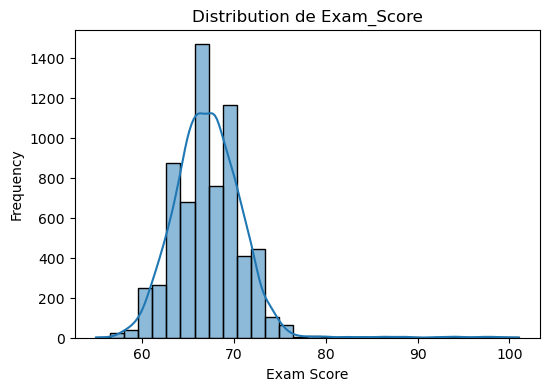

In [52]:
plt.figure(figsize=(6,4))
sns.histplot(data['Exam_Score'], bins=30, kde=True)
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.title("Distribution de Exam_Score")
plt.show()


#### **Observations de l'histogramme**

1. **Distribution bimodale** : L'histogramme révèle clairement **deux pics principaux** :
   - Un premier pic autour de **65-66 points**
   - Un second pic plus important autour de **68-69 points**
   - Cela suggère potentiellement **deux groupes d'élèves** avec des performances différentes

2. **Asymétrie légère** : Bien que la moyenne et la médiane soient proches, la distribution présente une **légère asymétrie à gauche** (queue à gauche plus longue qu'à droite).


**Analyse mulivariée : Exam_Score vs Hours_Studied**

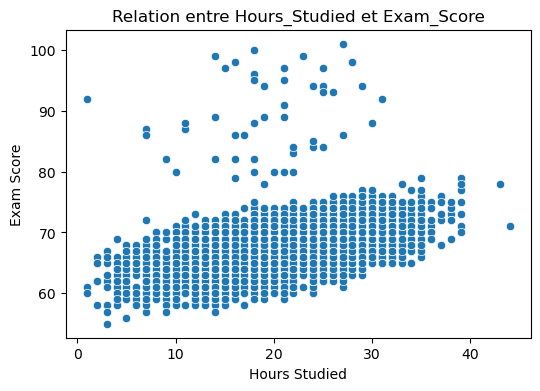

In [53]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=data['Hours_Studied'], y=data['Exam_Score'])
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Relation entre Hours_Studied et Exam_Score")
plt.show()


### **Analyse multivariée : `Exam_Score` et `Hours_Studied`**

Le nuage de points permet d'observer la relation entre le nombre d'heures d'étude et le score à l'examen.

Une tendance croissante suggère qu'une augmentation des heures d'étude est associée à une augmentation du score.

In [54]:
data[['Hours_Studied', 'Exam_Score']].corr()


,Hours_Studied,Exam_Score
Hours_Studied,1.000000,0.445455
Exam_Score,0.445455,1.000000


#### **Résultat obtenu**
Le coefficient de corrélation de Pearson calculé est de **0.445**, ce qui indique une **corrélation positive modérée** entre le temps d'étude et les résultats à l'examen.

#### **Interprétation**
- Une corrélation de 0.445 confirme la tendance positive observée dans le nuage de points
- Cette valeur modérée suggère que les heures d'étude expliquent une partie significative mais non exclusive de la variance des scores
- Environ 19.8% (0.445²) de la variation des scores peut être associée au temps d'étude

**Ajustement linéaire:**

In [55]:
X = data[['Hours_Studied']]
y = data['Exam_Score']

model = LinearRegression()
model.fit(X, y)

model.coef_, model.intercept_


(array([0.28929063]), np.float64(61.456983609504064))

### **Ajustement linéaire**

On ajuste un modèle de régression linéaire simple où :
- la variable explicative est `Hours_Studied`,
- la variable cible est `Exam_Score`.

Le coefficient indique l'effet moyen d'une heure d'étude supplémentaire sur le score à l'examen.

#### **Résultats de la régression**
- **Coefficient (pente)** : 0.289
- **Intercept (ordonnée à l'origine)** : 61.457

#### **Équation du modèle**
`Exam_Score = 61.457 + 0.289 × Hours_Studied`

#### **Interprétation**
- **Pour chaque heure d'étude supplémentaire**, le score à l'examen augmente en moyenne de **0.289 point**
- Un étudiant qui n'étudierait pas du tout (0 heure) aurait un score prédit de **61.457 points** (valeur théorique)
- L'effet, bien que positif, est **relativement faible** : il faut environ 3.5 heures d'étude pour gagner 1 point supplémentaire

#### **Limites**
Ce modèle linéaire simple explique seulement une partie de la variance des scores (R² ≈ 0.198), confirmant que d'autres facteurs que le temps d'étude influencent significativement les résultats.

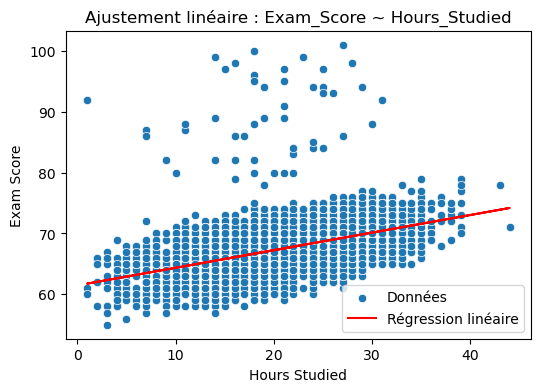

In [56]:
y_pred = model.predict(X)

plt.figure(figsize=(6,4))
sns.scatterplot(x=data['Hours_Studied'], y=data['Exam_Score'], label="Données")
plt.plot(data['Hours_Studied'], y_pred, color='red', label="Régression linéaire")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Ajustement linéaire : Exam_Score ~ Hours_Studied")
plt.legend()
plt.show()


#### **Observations du graphique**
1. **Adéquation modérée** : La droite de régression suit la tendance générale ascendante, mais de nombreux points s'en écartent significativement.

2. **Dispersion autour de la droite** : 
   - Pour les heures d'étude moyennes (15-25h), la dispersion est importante
   - Pour les extrêmes (très peu ou beaucoup d'heures), les points sont plus rares et parfois éloignés de la droite

3. **Limites du modèle linéaire** :
   - La relation semble légèrement curvilinéaire (rendements décroissants)
   - La variabilité des scores n'est pas constante le long de la droite (hétéroscédasticité)

#### **Conclusion**
Le modèle linéaire capture une partie de la relation, mais n'explique pas toute la complexité des données. D'autres modèles (polynomiaux, par exemple) pourraient potentiellement mieux s'adapter à la courbure observée dans le nuage de points.

## **Étude de la distribution de Exam_Score**

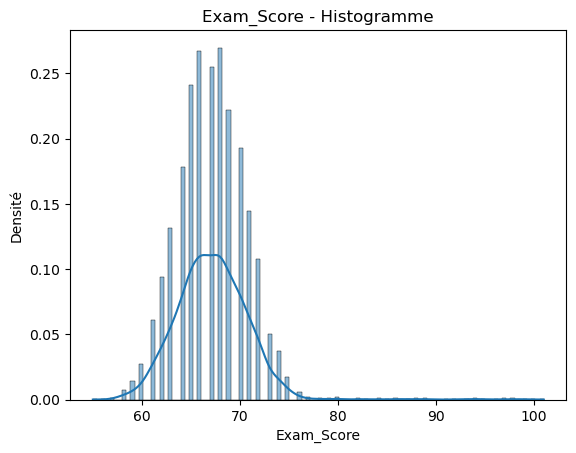

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [57]:
plt.figure()
sns.histplot(data["Exam_Score"], kde=True, stat="density")
plt.title("Exam_Score - Histogramme")
plt.xlabel("Exam_Score")
plt.ylabel("Densité")
plt.show()
plt.figure()

## **Ajustement d’une loi normale à la variable Exam_Score**

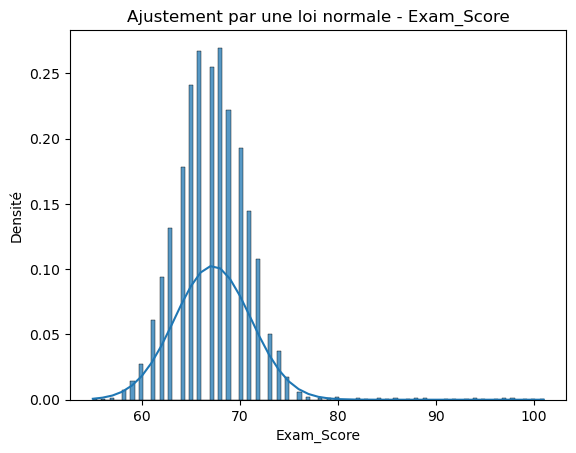

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [58]:
from scipy.stats import norm, poisson
mu, sigma = norm.fit(data["Exam_Score"])
x = data["Exam_Score"].sort_values()
y = norm.pdf(x, mu, sigma)

plt.figure()
sns.histplot(data["Exam_Score"], stat="density")
plt.plot(x, y)
plt.title("Ajustement par une loi normale - Exam_Score")
plt.xlabel("Exam_Score")
plt.ylabel("Densité")
plt.show()
plt.figure()

### **Exam_Score — Loi normale**

La variable **Exam_Score** est une variable continue.
L’histogramme présente une forme approximativement symétrique en cloche, centrée autour d’une moyenne.

**Pourquoi la loi normale est adaptée :**
- les données sont continues ;
- la distribution est symétrique ;
- les valeurs extrêmes sont rares.

**Conclusion :**  
La loi normale est adaptée pour modéliser la variable *Exam_Score*.


## **Étude de la distribution de Tutoring_Sessions**

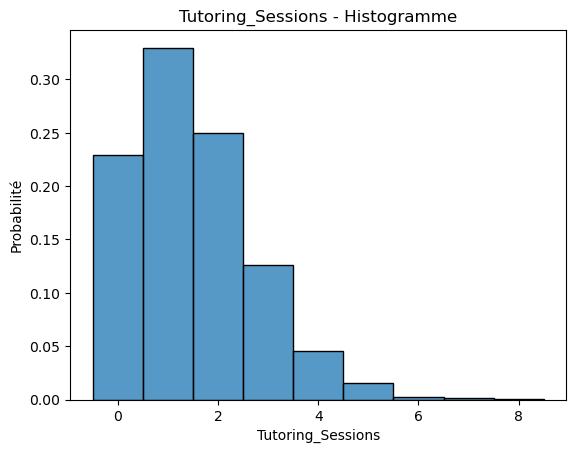

In [59]:
plt.figure()
sns.histplot(data["Tutoring_Sessions"], discrete=True, stat="probability")
plt.title("Tutoring_Sessions - Histogramme")
plt.xlabel("Tutoring_Sessions")
plt.ylabel("Probabilité")
plt.show()


## **Ajustement d’une loi de Poisson à la variable Tutoring_Sessions**

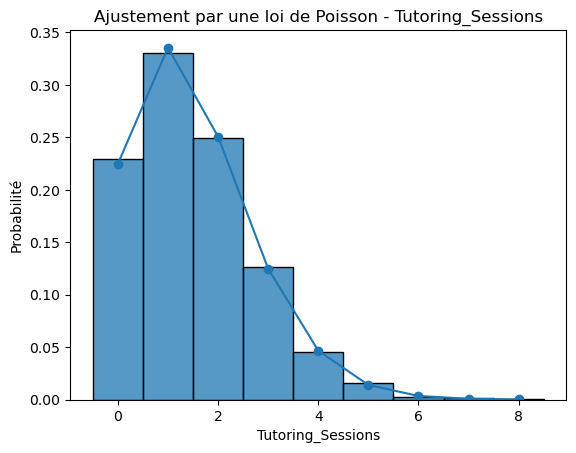

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [60]:
lambda_poisson = data["Tutoring_Sessions"].mean()
values = range(0, data["Tutoring_Sessions"].max() + 1)
pmf = poisson.pmf(values, lambda_poisson)

plt.figure()
sns.histplot(data["Tutoring_Sessions"], stat="probability", discrete=True)
plt.plot(values, pmf, marker='o')
plt.title("Ajustement par une loi de Poisson - Tutoring_Sessions")
plt.xlabel("Tutoring_Sessions")
plt.ylabel("Probabilité")
plt.show()
plt.figure()

La variable **Tutoring_Sessions** est discrète et correspond à un nombre d’occurrences.
La distribution est asymétrique à droite et concentrée sur les petites valeurs.

La loi de Poisson est adaptée pour modéliser ce type de variable.


## **Étude de la distribution de Hours_Studied**

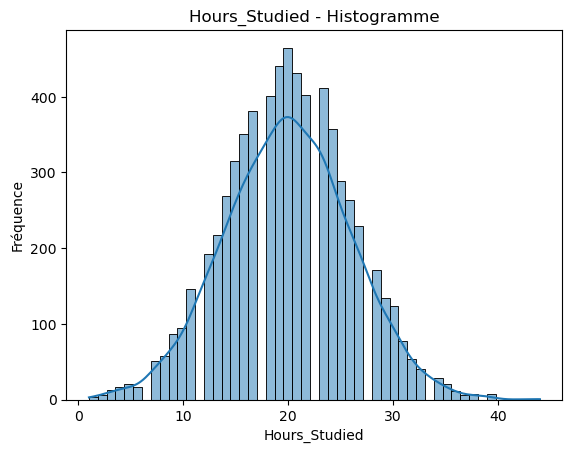

In [61]:
plt.figure()
sns.histplot(data["Hours_Studied"], kde=True)
plt.title("Hours_Studied - Histogramme")
plt.xlabel("Hours_Studied")
plt.ylabel("Fréquence")
plt.show()


La variable **Hours_Studied** est une variable continue représentant le temps d’étude.
L’histogramme montre une légère asymétrie.

La loi normale peut être utilisée comme approximation,
mais elle n’est pas parfaitement adaptée.


## **Conclusion sur le choix des lois de probabilité**

- **Exam_Score** : loi normale adaptée  
- **Tutoring_Sessions** : loi de Poisson adaptée  
- **Hours_Studied** : loi normale approximative  

Les lois choisies sont cohérentes avec la nature des variables
et les distributions observées.


## **Test de normalité pour la variable Exam_Score**

### **Test de Shapiro-Wilk**

In [62]:
from scipy.stats import shapiro

stat, p_value = shapiro(data["Exam_Score"])

stat, p_value


c:\Users\Salma\miniforge3\envs\algo2class\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6607.
  res = hypotest_fun_out(*samples, **kwds)


(np.float64(0.9029140953482367), np.float64(8.4304278588705e-54))

Bien que l’histogramme de **Exam_Score** présente une forme proche d’une loi normale,
le test de Shapiro-Wilk rejette l’hypothèse de normalité
(p-value = 8.43 × 10⁻⁵⁴).

Ce résultat s’explique par la grande taille de l’échantillon,
qui rend le test très sensible à de légères déviations par rapport à la normalité.

Ainsi, même si la loi normale n’est pas strictement respectée,
elle reste une approximation raisonnable pour décrire la distribution de **Exam_Score**.



## **Test d’adéquation pour la loi de Poisson — Tutoring_Sessions**

### **Test du Khi-deux**

In [64]:
from scipy.stats import poisson, chisquare
import numpy as np

# Observed frequencies
observed = data["Tutoring_Sessions"].value_counts().sort_index()

# Mean of the Poisson
lambda_poisson = data["Tutoring_Sessions"].mean()

# Expected frequencies for the same range as observed
expected_probs = poisson.pmf(observed.index, lambda_poisson)

# Normalize expected probabilities so they sum to 1 over the observed range
expected_probs /= expected_probs.sum()

# Scale to match total number of observations exactly
expected = expected_probs * observed.sum()

# Perform chi-square test
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)
chi2_stat, p_value




(np.float64(4.846365250290874), np.float64(0.773863571368366))

- **Statistique du Khi-deux :** 4.846  
- **p-value :** 0.774  

**Interprétation :**

1. La statistique du chi-deux mesure l'écart entre les **fréquences observées** et les **fréquences attendues** sous le modèle de Poisson.  
   - Une valeur élevée indique un grand écart.  
   - Ici, 4.846 est relativement faible, ce qui suggère que les données observées ne s'éloignent pas beaucoup des prévisions de la distribution de Poisson.

2. La **p-value** indique la probabilité d'obtenir une statistique du chi-deux aussi extrême ou plus si le modèle de Poisson est correct.  
   - Niveau de signification standard : α = 0.05  
   - Ici, p = 0.774 >> 0.05  

**Conclusion :**  
On **ne rejette pas l'hypothèse nulle**. Les données sur le nombre de séances de tutorat sont donc **consistantes avec une distribution de Poisson**.


## **Modèle de prédiction — Régression linéaire**

#### **But: Prédire la note Exam_Score à partir du nombre d’heures d’étude.**

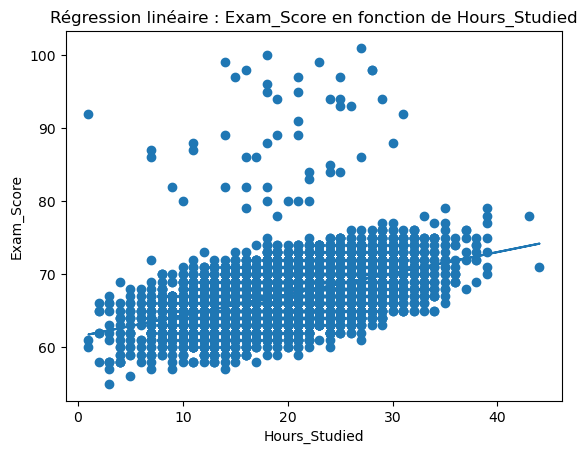

In [67]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = data[["Hours_Studied"]]
y = data["Exam_Score"]

model = LinearRegression()
model.fit(X, y)

model.coef_, model.intercept_
y_pred = model.predict(X)
plt.figure()
plt.scatter(X, y)
plt.plot(X, model.predict(X))
plt.xlabel("Hours_Studied")
plt.ylabel("Exam_Score")
plt.title("Régression linéaire : Exam_Score en fonction de Hours_Studied")
plt.show()


Cette dernière étape revient exactement à ce que nous avons fait dans la partie sur la régression linéaire, où nous avions essayé de trouver une expression permettant de prédire le score à l’examen en fonction du nombre d’heures étudiées

## **Analyse du modèle**

Nous utilisons une régression linéaire pour étudier la relation entre
le nombre d’heures d’étude et la note obtenue à l’examen.

Le graphique montre une relation croissante :
plus le nombre d’heures d’étude augmente,
plus la note tend à augmenter.

Ce modèle est simple mais permet de comprendre l’influence
du temps d’étude sur la performance scolaire.


## **Conclusion des analyses avancées**

Les tests statistiques confirment globalement les choix de lois de probabilité
réalisés précédemment.

La régression linéaire montre qu’il existe une relation positive
entre le temps d’étude et la note obtenue.

Ces analyses permettent de valider les modèles utilisés
et d’aller au-delà de la simple description des données.
